# ✅ Notebook 1 Summary

- Data loaded and cleaned (826 runs, 7 features).
- Created a dashboard of key stats (distance, pace, cadence, elevation).
- Visualised training patterns:
  - Distance progression over time
  - Monthly volume trends
  - Pace vs distance relationship
  - Cadence distribution

Next: **Notebook 2** will explore feature patterns in more detail:
- Rolling averages (weekly load, pace trends)
- Feature correlations (pace vs cadence, elevation, duration)
- Outlier detection


In [1]:
# ---
# 01_explore_data.ipynb
# Explore Garmin/Strava running data at session level
# ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid", context="talk")




In [2]:
# -----------------------------
# Helper function
# -----------------------------
def inspect_df(df, n=5):
    """Quick overview of a DataFrame: shape, columns, sample rows, missing values, and stats."""
    
    print("✅ DataFrame overview")
    print("- Rows:", df.shape[0], " | Columns:", df.shape[1])
    print("- Column names:", list(df.columns))
    
    # Show first and last n rows
    print("\n🔹 First rows:")
    display(df.head(n))
    print("\n🔹 Last rows:")
    display(df.tail(n))
    
    # Missing values
    print("\n🔹 Missing values per column:")
    print(df.isna().sum())
    
    # Summary stats (numeric only)
    print("\n🔹 Summary statistics:")
    display(df.describe())


In [3]:
# -----------------------------
# 1. Load aggregated summaries
# -----------------------------
summary_path = Path("../data/processed/runs_summary.csv")
summary_df = pd.read_csv(summary_path, parse_dates=["date"])

# Run the helper
inspect_df(summary_df)

✅ DataFrame overview
- Rows: 826  | Columns: 7
- Column names: ['filename', 'date', 'total_distance_km', 'duration_min', 'avg_pace_min_km', 'avg_cadence', 'total_elev_gain']

🔹 First rows:


,filename,date,total_distance_km,duration_min,avg_pace_min_km,avg_cadence,total_elev_gain
0,10011163869.csv,2023-06-25,12.06647,56.550000,4.686540,83.451356,94.4
1,10047123126.csv,2023-07-01,8.35794,66.833333,7.996388,81.568513,315.8
2,10049122762.csv,2023-07-01,3.71447,95.916667,25.822437,32.745813,172.4
3,10075256002.csv,2023-07-05,13.20205,67.700000,5.127991,82.731469,153.8
4,10100441652.csv,2023-07-08,NaN,52.550000,NaN,NaN,46.6



🔹 Last rows:


,filename,date,total_distance_km,duration_min,avg_pace_min_km,avg_cadence,total_elev_gain
821,9929670026.csv,2023-06-13,9.53401,46.016667,4.826580,83.102913,84.4
822,9943630948.csv,2023-06-15,10.01147,50.216667,5.015913,82.891941,72.4
823,9977687315.csv,2023-06-20,11.72700,55.866667,4.763935,83.990180,90.4
824,9986418548.csv,2023-06-21,9.68496,49.066667,5.066275,82.257885,87.0
825,9996601867.csv,2023-06-23,10.03637,52.200000,5.201084,82.458844,104.8



🔹 Missing values per column:
filename               0
date                   0
total_distance_km     27
duration_min           0
avg_pace_min_km       27
avg_cadence          102
total_elev_gain       50
dtype: int64

🔹 Summary statistics:


,date,total_distance_km,duration_min,avg_pace_min_km,avg_cadence,total_elev_gain
count,826,799.000000,826.000000,799.000000,724.000000,776.000000
mean,2021-09-21 17:53:53.898305280,9.993574,55.045218,7.368741,79.669044,125.699742
min,2014-09-29 00:00:00,0.074140,0.000000,1.813337,0.347059,0.000000
25%,2021-05-03 06:00:00,5.469090,30.125000,4.605933,82.657948,55.500000
50%,2022-01-31 00:00:00,10.013860,51.641667,4.984341,84.190963,85.900000
75%,2022-10-27 12:00:00,12.957865,65.925000,5.415621,85.883804,124.500000
max,2025-09-15 00:00:00,40.796130,1485.733333,344.191097,98.538462,1611.200000
std,NaN,5.638907,78.420080,21.077607,17.199669,168.815639


In [4]:
# -----------------------------
# 2. Basic cleaning
# -----------------------------

# Work on a copy (avoid overwriting original)
df = summary_df.copy()

# Convert timestamp if present (in case other exports include it)
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Drop completely empty columns (all NaN)
df = df.dropna(axis=1, how="all")

# Info after cleaning
print("✅ After cleaning:")
df.info()


✅ After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   filename           826 non-null    object        
 1   date               826 non-null    datetime64[ns]
 2   total_distance_km  799 non-null    float64       
 3   duration_min       826 non-null    float64       
 4   avg_pace_min_km    799 non-null    float64       
 5   avg_cadence        724 non-null    float64       
 6   total_elev_gain    776 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.3+ KB


In [5]:
# -----------------------------
# 3. Summary statistics
# -----------------------------

summary = {}

if "total_distance_km" in df.columns:
    summary["Total distance (km)"] = df["total_distance_km"].sum()
    summary["Avg distance per run (km)"] = df["total_distance_km"].mean()
    summary["Longest run (km)"] = df["total_distance_km"].max()

if "duration_min" in df.columns:
    summary["Total time (hours)"] = df["duration_min"].sum() / 60
    summary["Avg duration (min)"] = df["duration_min"].mean()

if "avg_pace_min_km" in df.columns:
    summary["Avg pace (min/km)"] = df["avg_pace_min_km"].mean()
    summary["Fastest pace (min/km)"] = df["avg_pace_min_km"].min()

if "avg_cadence" in df.columns:
    summary["Avg cadence (spm)"] = df["avg_cadence"].mean()
    summary["Max cadence (spm)"] = df["avg_cadence"].max()

if "total_elev_gain" in df.columns:
    summary["Total elevation gain (m)"] = df["total_elev_gain"].sum()
    summary["Max elevation in a run (m)"] = df["total_elev_gain"].max()

# Convert dict → DataFrame for display
summary_df = pd.DataFrame.from_dict(summary, orient="index", columns=["Value"])

# Format numbers: round floats nicely
summary_df["Value"] = summary_df["Value"].apply(
    lambda x: f"{x:,.2f}" if isinstance(x, (float, int)) else x
)

print("✅ Overall summary of runs:")
display(summary_df)



✅ Overall summary of runs:


,Value
Total distance (km),"7,984.87"
Avg distance per run (km),9.99
Longest run (km),40.80
Total time (hours),757.79
Avg duration (min),55.05
Avg pace (min/km),7.37
Fastest pace (min/km),1.81
Avg cadence (spm),79.67
Max cadence (spm),98.54
Total elevation gain (m),"97,543.00"


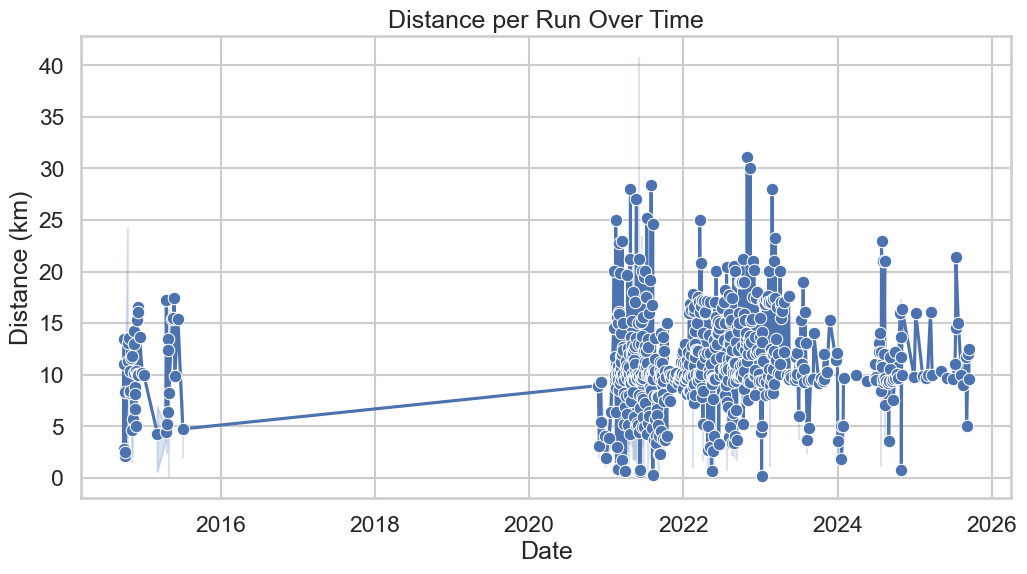

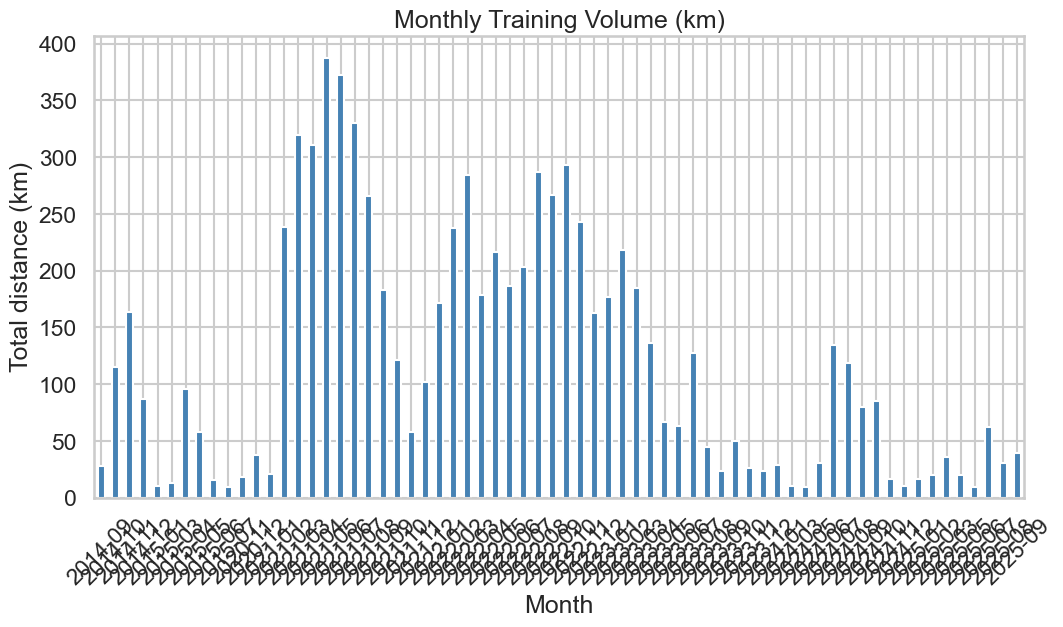

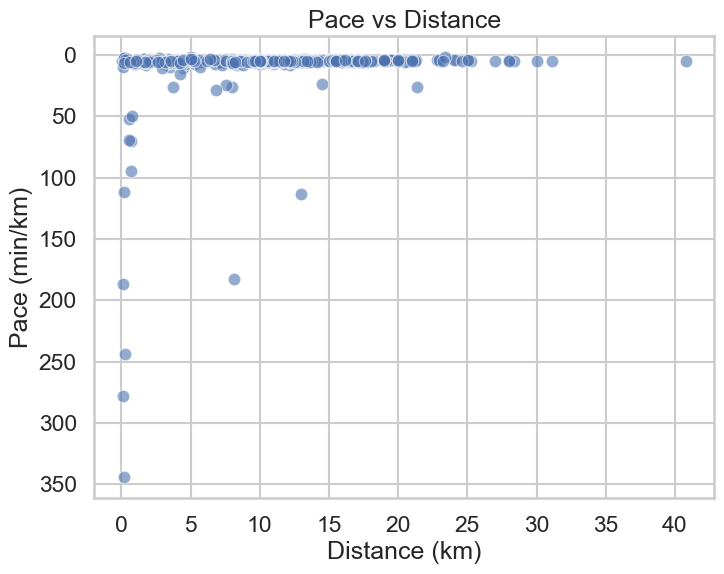

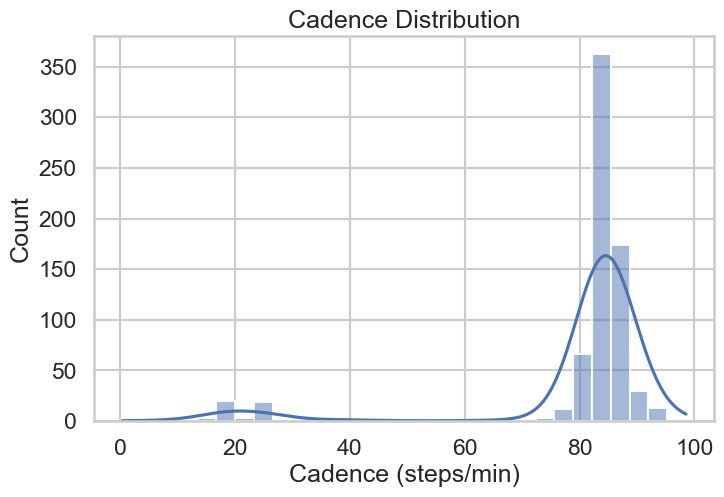

In [6]:
# -----------------------------
# 4. Visualisations — overview
# -----------------------------
sns.set(style="whitegrid", context="talk")

# 📈 Distance over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="date", y="total_distance_km", marker="o")
plt.title("Distance per Run Over Time")
plt.ylabel("Distance (km)")
plt.xlabel("Date")
plt.show()

# 📊 Monthly training volume
df["month"] = df["date"].dt.to_period("M")
monthly_km = df.groupby("month")["total_distance_km"].sum()

plt.figure(figsize=(12,6))
monthly_km.plot(kind="bar", color="steelblue")
plt.title("Monthly Training Volume (km)")
plt.ylabel("Total distance (km)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# 🏃 Pace vs Distance scatter
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total_distance_km", y="avg_pace_min_km", alpha=0.6)
plt.title("Pace vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.gca().invert_yaxis()  # faster paces at the top
plt.show()

# 👟 Cadence distribution
if "avg_cadence" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["avg_cadence"].dropna(), bins=30, kde=True)
    plt.title("Cadence Distribution")
    plt.xlabel("Cadence (steps/min)")
    plt.show()

In [7]:
# -----------------------------
# 4b. Additional Visualizations
# -----------------------------

# 1. Pace distribution as percent of time
if "speed" in df.columns:
    pace = (1000 / df["speed"]) / 60  # convert speed m/s → pace min/km
    
    plt.figure(figsize=(8,5))
    sns.histplot(pace, bins=30, stat="percent", kde=False, color="skyblue")
    plt.title("Pace Distribution (% of Time)")
    plt.xlabel("Pace (min/km)")
    plt.ylabel("Percent of Time (%)")
    plt.show()

# 2. Pace vs Ground Contact Time (if available)
if "ground_contact_time" in df.columns:
    df["pace_min_per_km"] = (1000 / df["speed"]) / 60
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="pace_min_per_km", y="ground_contact_time", alpha=0.5)
    plt.title("Pace vs Ground Contact Time")
    plt.xlabel("Pace (min/km)")
    plt.ylabel("Ground Contact Time (ms)")
    plt.gca().invert_xaxis()  # faster pace to the right
    plt.show()
else:
    print("⚠️ No 'ground_contact_time' column found in this dataset.")


⚠️ No 'ground_contact_time' column found in this dataset.


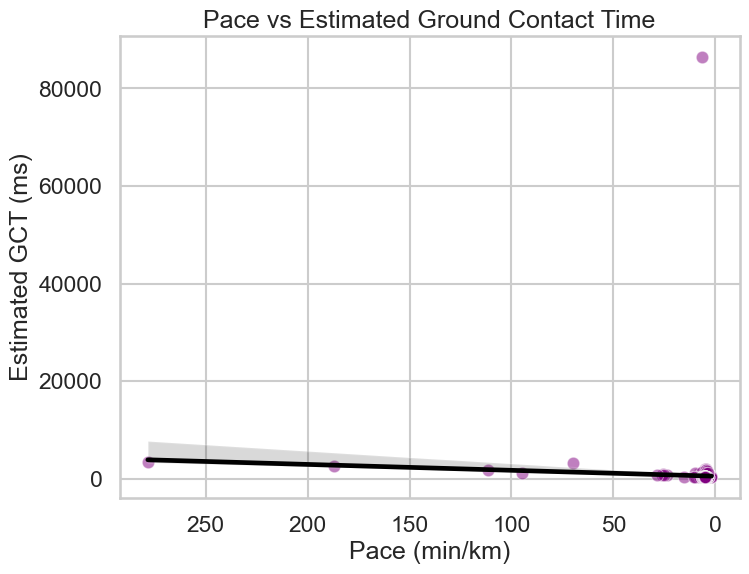

In [8]:
# -----------------------------
# 4c. Estimated Ground Contact Time (using avg_cadence)
# -----------------------------

if "avg_cadence" in df.columns and "avg_pace_min_km" in df.columns:
    # Estimate GCT (very rough heuristic)
    df["gct_est_ms"] = 30000 / df["avg_cadence"]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="avg_pace_min_km", y="gct_est_ms", alpha=0.5, color="purple")
    sns.regplot(
        data=df,
        x="avg_pace_min_km",
        y="gct_est_ms",
        scatter=False,
        line_kws={"color": "black"}
    )
    plt.title("Pace vs Estimated Ground Contact Time")
    plt.xlabel("Pace (min/km)")
    plt.ylabel("Estimated GCT (ms)")
    plt.gca().invert_xaxis()  # faster pace to the right
    plt.show()
else:
    print("⚠️ Required columns not found (avg_cadence, avg_pace_min_km).")



In [9]:
# -----------------------------
# 4d. Heart Rate vs Cadence (with pace color)
# -----------------------------

if "heart_rate" in df.columns and "cadence" in df.columns and "speed" in df.columns:
    # Compute pace if not already available
    if "pace_min_per_km" not in df.columns:
        df["pace_min_per_km"] = (1000 / df["speed"]) / 60

    plt.figure(figsize=(10,7))
    scatter = plt.scatter(
        df["cadence"],
        df["heart_rate"],
        c=df["pace_min_per_km"],
        cmap="viridis",
        alpha=0.6
    )
    plt.colorbar(scatter, label="Pace (min/km)")
    plt.title("Heart Rate vs Cadence (colored by Pace)")
    plt.xlabel("Cadence (steps/min)")
    plt.ylabel("Heart Rate (bpm)")
    plt.show()
else:
    print("⚠️ Heart rate or speed data not found in this dataset.")


⚠️ Heart rate or speed data not found in this dataset.
